In [2]:
# First let's start with some simple imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, Hodograph, SkewT
from metpy.units import units

# FInd the average soundings for each convective cell property

In [3]:
%store -r all_minute_numbers_regions

In [4]:
list_of_data = ['Upwind', 'Urban', 'Downwind']

In [5]:
data = all_minute_numbers_regions[2]
num = '(c)'
plot_title = list_of_data[2]

In [6]:
len(data)

1509

In [24]:
import pandas as pd

def load_dataframes(base_path, numbers, column_names):
    dataframes = []  # List to store the DataFrames
    for number in numbers:
        file_path = f"{base_path}{number}.txt"  # Generate file path dynamically
        df = pd.read_csv(file_path, delimiter='\t', names=column_names, header=0, skiprows=1)
        dataframes.append(df)
    return dataframes

# Base path without the number and extension
base_path = 'C:/Users/omitu/Documents/GitHub/Urbanization-and-Climate-Change/Second_part/data/sounding/Tables/data-'

# Column names
column_names = ['height', 'pressure', 'temperature', 'dewpoint', 'rh', 'direction', 'speed']

# Specify the range of numbers for the files you want to load, e.g., from 1336 to 1339
numbers = data

# Load the DataFrames
dfs = load_dataframes(base_path, numbers, column_names)

# Example: Display the first few rows of the first DataFrame
dfs[0].head()


,height,pressure,temperature,dewpoint,rh,direction,speed
0,28.0,1008.10,24.61,21.52,83.02,22.41,1.93
1,48.0,1005.81,24.85,21.12,79.86,23.44,2.49
2,68.0,1003.53,24.77,21.01,79.75,23.97,3.00
3,88.0,1001.25,24.63,20.91,79.94,25.97,3.45
4,108.0,998.98,24.50,20.84,80.25,29.26,3.74


In [25]:
dfs[0]

,height,pressure,temperature,dewpoint,rh,direction,speed
0,28.00,1008.10,24.61,21.52,83.02,22.41,1.93
1,48.00,1005.81,24.85,21.12,79.86,23.44,2.49
2,68.00,1003.53,24.77,21.01,79.75,23.97,3.00
3,88.00,1001.25,24.63,20.91,79.94,25.97,3.45
4,108.00,998.98,24.50,20.84,80.25,29.26,3.74
...,...,...,...,...,...,...,...
297,24008.01,29.60,-55.06,-86.69,1.13,76.23,4.72
298,24508.01,27.38,-53.07,-85.97,1.01,105.11,6.20
299,25008.01,25.34,-51.14,-84.98,0.94,125.05,6.21
300,25508.01,23.44,-50.96,-85.52,0.84,160.68,4.41


In [26]:
df_mean = pd.concat(dfs).groupby(level=0).mean()

In [27]:
df_mean

,height,pressure,temperature,dewpoint,rh,direction,speed
0,28.00,1011.723956,29.452942,23.480113,71.343671,160.569622,2.761193
1,48.00,1009.465752,29.242883,23.151060,70.706574,160.351246,3.438469
2,68.00,1007.211127,29.045441,22.967409,70.701378,160.180351,4.005149
3,88.00,1004.958880,28.882266,22.854685,70.856415,159.801584,4.478840
4,108.00,1002.711849,28.709205,22.779032,71.212803,159.675003,4.837588
...,...,...,...,...,...,...,...
303,27008.01,19.125177,-48.652389,-84.639587,0.768702,89.277743,18.771932
304,27508.01,17.728161,-47.912625,-84.371973,0.737586,91.807031,19.240594
305,28008.01,16.438185,-46.681952,-83.655240,0.730000,91.541370,19.249486
306,28508.01,15.225455,-46.907121,-84.087727,0.690152,89.822727,17.522879


In [28]:
df = df_mean

In [29]:
import pandas as pd

def find_nearest_pressure_wind_speed(df, target_pressure):
    # Calculate the absolute difference from the target pressure
    df['pressure_diff'] = abs(df['pressure'] - target_pressure)

    # Find the entry with the smallest difference to the target pressure
    nearest_pressure_entry = df.loc[df['pressure_diff'].idxmin()]

    return nearest_pressure_entry['speed']

# Use the function with a target pressure of 700 hPa
wind_surface = find_nearest_pressure_wind_speed(df, 1000)
wind_900 = find_nearest_pressure_wind_speed(df, 900)
wind_700 = find_nearest_pressure_wind_speed(df, 700)


# Plot the soundings

In [30]:
p = df['pressure'].values * units.hPa
z = df['height'].values * units.m
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
rh = df['rh'].values
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

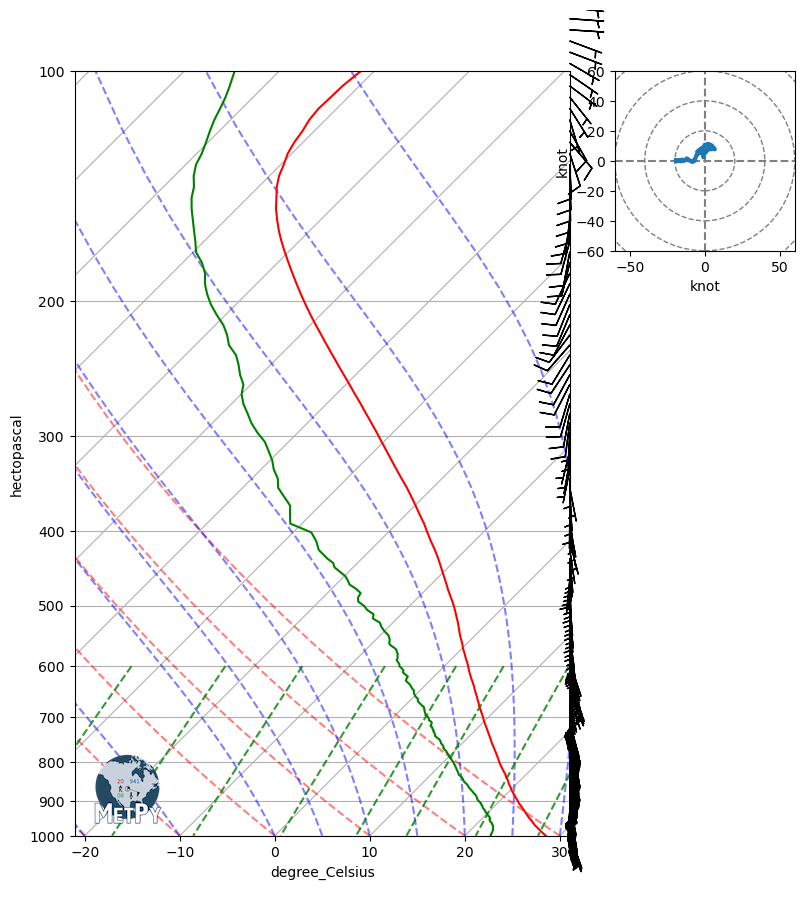

In [31]:
fig = plt.figure(figsize=(9, 9))
add_metpy_logo(fig, 90, 80, size='small')
skew = SkewT(fig, rotation=45, rect=(0.1, 0.1, 0.55, 0.85))

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

# Change to adjust data limits and give it a semblance of what we want
skew.ax.set_adjustable('datalim')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-20, 30)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Create a hodograph
ax = plt.axes((0.7, 0.75, 0.2, 0.2))
h = Hodograph(ax, component_range=60.)
h.add_grid(increment=20)
h.plot(u, v)

In [32]:
interval = np.logspace(2, 3, 40) * units.hPa
idx = mpcalc.resample_nn_1d(p, interval)
skew.plot_barbs(pressure=p[idx], u=u[idx], v=v[idx])

C:\Users\omitu\AppData\Local\Temp\ipykernel_89060\3799264001.py:256: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\omitu\AppData\Local\Temp\ipykernel_89060\3799264001.py:256: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


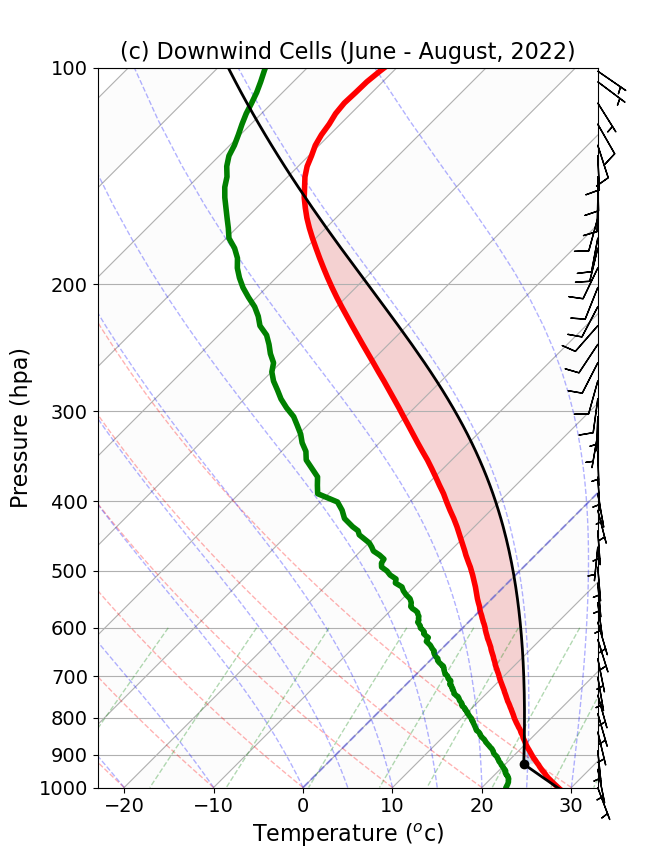

In [33]:
# STEP 1: CREATE THE SKEW-T OBJECT AND MODIFY IT TO CREATE A
# NICE, CLEAN PLOT
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(10, 8), constrained_layout=True)
skew = SkewT(fig, rotation=45, rect=(0.05, 0.05, 0.50, 0.90))

# add the Metpy logo
# add_metpy_logo(fig, 105, 85, size='small')

# Change to adjust data limits and give it a semblance of what we want
skew.ax.set_adjustable('datalim')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-20, 30)
skew.ax.tick_params(axis='both', which='major', labelsize=14)

# Set some better labels than the default to increase readability
skew.ax.set_xlabel(str.capitalize(f'Temperature ($^o$C)'), weight='normal', fontsize=16)
skew.ax.set_ylabel(str.capitalize(f'Pressure (hPa)'), weight='normal', fontsize=16)

# Set the facecolor of the skew-t object and the figure to white
fig.set_facecolor('#ffffff')
skew.ax.set_facecolor('#ffffff')

# Here we can use some basic math and Python functionality to make a cool
# shaded isotherm pattern.
x1 = np.linspace(-100, 40, 8)
x2 = np.linspace(-90, 50, 8)
y = [1100, 50]
for i in range(0, 8):
    skew.shade_area(y=y, x1=x1[i], x2=x2[i], color='gray', alpha=0.02, zorder=1)

# STEP 2: PLOT DATA ON THE SKEW-T. TAKE A COUPLE EXTRA STEPS TO
# INCREASE READABILITY
# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
# Set the linewidth to 4 for increased readability.
# We will also add the 'label' keyword argument for our legend.
skew.plot(p, T, 'r', lw=4, label='TEMPERATURE')
skew.plot(p, Td, 'g', lw=4, label='DEWPOINT')

# Again we can use some simple Python math functionality to 'resample'
# the wind barbs for a cleaner output with increased readability.
# Something like this would work.
interval = np.logspace(2, 3, 40) * units.hPa
idx = mpcalc.resample_nn_1d(p, interval)
skew.plot_barbs(pressure=p[idx], u=u[idx], v=v[idx])

# Add the relevant special lines native to the Skew-T Log-P diagram &
# provide basic adjustments to linewidth and alpha to increase readability
# first, we add a matplotlib axvline to highlight the 0-degree isotherm
skew.ax.axvline(0 * units.degC, linestyle='--', color='blue', alpha=0.3)
skew.plot_dry_adiabats(lw=1, alpha=0.3)
skew.plot_moist_adiabats(lw=1, alpha=0.3)
skew.plot_mixing_lines(lw=1, alpha=0.3)

# Calculate LCL height and plot as a black dot. Because `p`'s first value is
# ~1000 mb and its last value is ~250 mb, the `0` index is selected for
# `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
# i.e. start from a low value, 250 mb, to a high value, 1000 mb, the `-1` index
# should be selected.
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2, label='SB PARCEL PATH')

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, prof, Td, alpha=0.2, label='SBCIN')
skew.shade_cape(p, T, prof, alpha=0.2, label='SBCAPE')

# STEP 3: CREATE THE HODOGRAPH INSET. TAKE A FEW EXTRA STEPS TO
# INCREASE READABILITY
# Create a hodograph object: first we need to add an axis
# then we can create the Metpy Hodograph
# hodo_ax = plt.axes((0.48, 0.45, 0.5, 0.5))
# h = Hodograph(hodo_ax, component_range=80.)

# Add two separate grid increments for a cooler look. This also
# helps to increase readability
# h.add_grid(increment=20, ls='-', lw=1.5, alpha=0.5)
# h.add_grid(increment=10, ls='--', lw=1, alpha=0.2)

# The next few steps makes for a clean hodograph inset, removing the
# tick marks, tick labels, and axis labels
# h.ax.set_box_aspect(1)
# h.ax.set_yticklabels([])
# h.ax.set_xticklabels([])
# h.ax.set_xticks([])
# h.ax.set_yticks([])
# h.ax.set_xlabel(' ')
# h.ax.set_ylabel(' ')

# Here we can add a simple Python for loop that adds tick marks
# to the inside of the hodograph plot to increase readability!
# plt.xticks(np.arange(0, 0, 1))
# plt.yticks(np.arange(0, 0, 1))
# for i in range(10, 120, 10):
#     h.ax.annotate(str(i), (i, 0), xytext=(0, 2), textcoords='offset pixels',
#                   clip_on=True, fontsize=10, weight='bold', alpha=0.5, zorder=0)
# for i in range(10, 120, 10):
#     h.ax.annotate(str(i), (0, i), xytext=(0, 2), textcoords='offset pixels',
#                   clip_on=True, fontsize=10, weight='bold', alpha=0.5, zorder=0)

# plot the hodograph itself, using plot_colormapped, colored
# by height
# h.plot_colormapped(u, v, c=z, linewidth=6, label='0-12km WIND')
# # compute Bunkers storm motion so we can plot it on the hodograph!
# RM, LM, MW = mpcalc.bunkers_storm_motion(p, u, v, z)
# h.ax.text((RM[0].m + 0.5), (RM[1].m - 0.5), 'RM', weight='bold', ha='left',
#           fontsize=13, alpha=0.6)
# h.ax.text((LM[0].m + 0.5), (LM[1].m - 0.5), 'LM', weight='bold', ha='left',
#           fontsize=13, alpha=0.6)
# h.ax.text((MW[0].m + 0.5), (MW[1].m - 0.5), 'MW', weight='bold', ha='left',
#           fontsize=13, alpha=0.6)
# h.ax.arrow(0, 0, RM[0].m - 0.3, RM[1].m - 0.3, linewidth=2, color='black',
#            alpha=0.5, label='Bunkers RM Vector',
#            length_includes_head=True, head_width=2)

# STEP 4: ADD A FEW EXTRA ELEMENTS TO REALLY MAKE A NEAT PLOT
# First we want to actually add values of data to the plot for easy viewing
# To do this, let's first add a simple rectangle using Matplotlib's 'patches'
# functionality to add some simple layout for plotting calculated parameters
#                                  xloc   yloc   xsize  ysize
# fig.patches.extend([plt.Rectangle((0.563, 0.05), 0.334, 0.37,
#                                   edgecolor='black', facecolor='white',
#                                   linewidth=1, alpha=1, transform=fig.transFigure,
#                                   figure=fig)])

# Now let's take a moment to calculate some simple severe-weather parameters using
# metpy's calculations
# Here are some classic severe parameters!
kindex = mpcalc.k_index(p, T, Td)
total_totals = mpcalc.total_totals_index(p, T, Td)

# mixed layer parcel properties!
ml_t, ml_td = mpcalc.mixed_layer(p, T, Td, depth=50 * units.hPa)
ml_p, _, _ = mpcalc.mixed_parcel(p, T, Td, depth=50 * units.hPa)
mlcape, mlcin = mpcalc.mixed_layer_cape_cin(p, T, prof, depth=50 * units.hPa)

# most unstable parcel properties!
mu_p, mu_t, mu_td, _ = mpcalc.most_unstable_parcel(p, T, Td, depth=50 * units.hPa)
mucape, mucin = mpcalc.most_unstable_cape_cin(p, T, Td, depth=50 * units.hPa)

# Estimate height of LCL in meters from hydrostatic thickness (for sig_tor)
new_p = np.append(p[p > lcl_pressure], lcl_pressure)
new_t = np.append(T[p > lcl_pressure], lcl_temperature)
lcl_height = mpcalc.thickness_hydrostatic(new_p, new_t)

# Compute Surface-based CAPE
sbcape, sbcin = mpcalc.surface_based_cape_cin(p, T, Td)
# Compute SRH
(u_storm, v_storm), *_ = mpcalc.bunkers_storm_motion(p, u, v, z)
*_, total_helicity1 = mpcalc.storm_relative_helicity(z, u, v, depth=1 * units.km,
                                                     storm_u=u_storm, storm_v=v_storm)
*_, total_helicity3 = mpcalc.storm_relative_helicity(z, u, v, depth=3 * units.km,
                                                     storm_u=u_storm, storm_v=v_storm)
*_, total_helicity6 = mpcalc.storm_relative_helicity(z, u, v, depth=6 * units.km,
                                                     storm_u=u_storm, storm_v=v_storm)

# Copmute Bulk Shear components and then magnitude
ubshr1, vbshr1 = mpcalc.bulk_shear(p, u, v, height=z, depth=1 * units.km)
bshear1 = mpcalc.wind_speed(ubshr1, vbshr1)
ubshr3, vbshr3 = mpcalc.bulk_shear(p, u, v, height=z, depth=3 * units.km)
bshear3 = mpcalc.wind_speed(ubshr3, vbshr3)
ubshr6, vbshr6 = mpcalc.bulk_shear(p, u, v, height=z, depth=6 * units.km)
bshear6 = mpcalc.wind_speed(ubshr6, vbshr6)

# Use all computed pieces to calculate the Significant Tornado parameter
sig_tor = mpcalc.significant_tornado(sbcape, lcl_height,
                                     total_helicity3, bshear3).to_base_units()

# Perform the calculation of supercell composite if an effective layer exists
super_comp = mpcalc.supercell_composite(mucape, total_helicity3, bshear3)

# There is a lot we can do with this data operationally, so let's plot some of
# these values right on the plot, in the box we made
# First lets plot some thermodynamic parameters
# plt.figtext(0.58, 0.37, 'SBCAPE: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.71, 0.37, f'{sbcape:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')
# plt.figtext(0.58, 0.34, 'SBCIN: ', weight='normal',
#             fontsize=15, color='black', ha='left')
# plt.figtext(0.71, 0.34, f'{sbcin:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')
# plt.figtext(0.58, 0.29, 'MLCAPE: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.71, 0.29, f'{mlcape:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')
# plt.figtext(0.58, 0.26, 'MLCIN: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.71, 0.26, f'{mlcin:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')
# plt.figtext(0.58, 0.21, 'MUCAPE: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.71, 0.21, f'{mucape:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')
# plt.figtext(0.58, 0.18, 'MUCIN: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.71, 0.18, f'{mucin:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')
# plt.figtext(0.58, 0.13, 'TT-INDEX: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.71, 0.13, f'{total_totals:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')
# plt.figtext(0.58, 0.10, 'K-INDEX: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.71, 0.10, f'{kindex:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')

# # now some kinematic parameters
# plt.figtext(0.73, 0.37, '0-1km SRH: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.88, 0.37, f'{total_helicity1:.0f~P}',
#             weight='normal', fontsize=15, color='black', ha='right')
# plt.figtext(0.73, 0.34, '0-1km SHEAR: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.88, 0.34, f'{bshear1:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')
# plt.figtext(0.73, 0.29, '0-3km SRH: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.88, 0.29, f'{total_helicity3:.0f~P}',
#             weight='normal', fontsize=15, color='black', ha='right')
# plt.figtext(0.73, 0.26, '0-3km SHEAR: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.88, 0.26, f'{bshear3:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')
# plt.figtext(0.73, 0.21, '0-6km SRH: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.88, 0.21, f'{total_helicity6:.0f~P}',
#             weight='normal', fontsize=15, color='black', ha='right')
# plt.figtext(0.73, 0.18, '0-6km SHEAR: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.88, 0.18, f'{bshear6:.0f~P}', weight='normal',
#             fontsize=15, color='black', ha='right')
# plt.figtext(0.73, 0.13, 'SIG TORNADO: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.88, 0.13, f'{sig_tor[0]:.0f~P}', weight='normal', fontsize=15,
#             color='black', ha='right')
# plt.figtext(0.73, 0.10, 'SUPERCELL COMP: ', weight='normal', fontsize=15,
#             color='black', ha='left')
# plt.figtext(0.88, 0.10, f'{super_comp[0]:.0f~P}', weight='normal', fontsize=15,
#             color='black', ha='right')

# Add legends to the skew and hodo
# skewleg = skew.ax.legend(loc='upper left')
# hodoleg = h.ax.legend(loc='upper left')

# add a quick plot title, this could be automated by
# declaring a station and datetime variable when using
# realtime observation data from Siphon.
plt.title(f'{num} {plot_title} Cells (June - August, 2022)',
            weight='normal', fontsize=16, ha='center')

# Show the plot
plt.tight_layout()
plt.savefig(f'C:/Users/omitu/Documents/GitHub/Urbanization-and-Climate-Change/Second_part/data/sounding/plots/{plot_title}.png', dpi=200, bbox_inches='tight')
plt.show()

In [34]:
# Copyright (c) 2022 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause
"""
=============================
Sounding Calculation Examples
=============================

Use functions from `metpy.calc` to perform a number of calculations using sounding data.

The code below uses example data to perform many sounding calculations for a severe weather
event on May 22, 2011 from the Norman, OK sounding.
"""
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units

###########################################
# Effective Shear Algorithm for use in Supercell Composite Calculation


def effective_layer(p, t, td, h, height_layer=False):
    """A function that determines the effective inflow layer for a convective sounding.

    Uses the default values of Thompason et al. (2004) for CAPE (100 J/kg) and CIN (-250 J/kg).

    Input:
      - p: sounding pressure with units
      - T: sounding temperature with units
      - Td: sounding dewpoint temperature with units
      - h: sounding heights with units

    Returns:
      - pbot/hbot, ptop/htop: pressure/height of the bottom level,
                              pressure/height of the top level
    """
    from metpy.calc import cape_cin, parcel_profile
    from metpy.units import units

    pbot = None

    for i in range(p.shape[0]):
        prof = parcel_profile(p[i:], t[i], td[i])
        sbcape, sbcin = cape_cin(p[i:], t[i:], td[i:], prof)
        if sbcape >= 100 * units('J/kg') and sbcin > -250 * units('J/kg'):
            pbot = p[i]
            hbot = h[i]
            bot_idx = i
            break
    if not pbot:
        return None, None

    for i in range(bot_idx + 1, p.shape[0]):
        prof = parcel_profile(p[i:], t[i], td[i])
        sbcape, sbcin = cape_cin(p[i:], t[i:], td[i:], prof)
        if sbcape < 100 * units('J/kg') or sbcin < -250 * units('J/kg'):
            ptop = p[i]
            htop = h[i]
            break

    if height_layer:
        return hbot, htop
    else:
        return pbot, ptop


###########################################
import pandas as pd
import os

rows = []


###########################################
# Isolate needed variables from our data file and attach units
p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wdir = df['direction'].values * units.degree
sped = df['speed'].values * units.knot
height = df['height'].values * units.meter

###########################################
# Compute the wind components
u, v = mpcalc.wind_components(sped, wdir)

###########################################
# Compute common sounding index parameters
ctotals = mpcalc.cross_totals(p, T, Td)
kindex = mpcalc.k_index(p, T, Td)
showalter = mpcalc.showalter_index(p, T, Td)
total_totals = mpcalc.total_totals_index(p, T, Td)
vert_totals = mpcalc.vertical_totals(p, T)

###########################################
# Compture the parcel profile for a surface-based parcel
prof = mpcalc.parcel_profile(p, T[0], Td[0])

###########################################
# Compute the corresponding LI, CAPE, CIN values for a surface parcel
lift_index = mpcalc.lifted_index(p, T, prof)
cape, cin = mpcalc.cape_cin(p, T, Td, prof)

###########################################
# Determine the LCL, LFC, and EL for our surface parcel
lclp, lclt = mpcalc.lcl(p[0], T[0], Td[0])
lfcp, _ = mpcalc.lfc(p, T, Td)
el_pressure, el_t = mpcalc.el(p, T, Td, prof)

###########################################
# Compute the characteristics of a mean layer parcel (50-hPa depth)
ml_t, ml_td = mpcalc.mixed_layer(p, T, Td, depth=50 * units.hPa)
ml_p, _, _ = mpcalc.mixed_parcel(p, T, Td, depth=50 * units.hPa)
mlcape, mlcin = mpcalc.mixed_layer_cape_cin(p, T, prof, depth=50 * units.hPa)

###########################################
# Compute the characteristics of the most unstable parcel (50-hPa depth)
mu_p, mu_t, mu_td, _ = mpcalc.most_unstable_parcel(p, T, Td, depth=50 * units.hPa)
mucape, mucin = mpcalc.most_unstable_cape_cin(p, T, Td, depth=50 * units.hPa)

###########################################
# Compute the Bunkers Storm Motion vector and use to calculate the critical angle
(u_storm, v_storm), *_ = mpcalc.bunkers_storm_motion(p, u, v, height)
critical_angle = mpcalc.critical_angle(p, u, v, height, u_storm, v_storm)

###########################################
# Work on the calculations needed to compute the significant tornado parameter

# Estimate height of LCL in meters from hydrostatic thickness
new_p = np.append(p[p > lclp], lclp)
new_t = np.append(T[p > lclp], lclt)
lcl_height = mpcalc.thickness_hydrostatic(new_p, new_t)

# Compute Surface-based CAPE
sbcape, sbcin = mpcalc.surface_based_cape_cin(p, T, Td)

# Calculate the Sweat index
sweat = mpcalc.sweat_index(p, T, Td, wind_speed, wind_dir)

# Compute convective condensation level
ccl_p, ccl_t, ccl_dewp = mpcalc.ccl(p, T, Td)


# Compute SRH
*_, total_helicity1 = mpcalc.storm_relative_helicity(height, u, v, depth=1 * units.km,
                                                     storm_u=u_storm, storm_v=v_storm)
*_, total_helicity3 = mpcalc.storm_relative_helicity(height, u, v, depth=3 * units.km,
                                                     storm_u=u_storm, storm_v=v_storm)
*_, total_helicity6 = mpcalc.storm_relative_helicity(height, u, v, depth=6 * units.km,
                                                     storm_u=u_storm, storm_v=v_storm)
# Copmute Bulk Shear components and then magnitude
ubshr, vbshr = mpcalc.bulk_shear(p, u, v, height=height, depth=6 * units.km)
bshear = mpcalc.wind_speed(ubshr, vbshr)

# Use all computed pieces to calculate the Significant Tornado parameter
sig_tor1 = mpcalc.significant_tornado(sbcape, lcl_height,
                                    total_helicity1, bshear).to_base_units()
sig_tor3 = mpcalc.significant_tornado(sbcape, lcl_height,
                                    total_helicity3, bshear).to_base_units()
sig_tor6 = mpcalc.significant_tornado(sbcape, lcl_height,
                                    total_helicity6, bshear).to_base_units()

###########################################
# Compute the supercell composite parameter, if possible

# Determine the top and bottom of the effective layer using our own function
hbot, htop = effective_layer(p, T, Td, height, height_layer=True)

# Perform the calculation of supercell composite if an effective layer exists
if hbot:
    esrh = mpcalc.storm_relative_helicity(height, u, v, depth=htop - hbot, bottom=hbot)
    eubshr, evbshr = mpcalc.bulk_shear(p, u, v, height=height, depth=htop - hbot, bottom=hbot)
    ebshear = mpcalc.wind_speed(eubshr, evbshr)

    super_comp = mpcalc.supercell_composite(mucape, esrh[0], ebshear)
else:
    super_comp = np.nan

# Calculate precipitatable water
pw = mpcalc.precipitable_water(p, Td)

# Compute the bulk shear
ubshr1, vbshr1 = mpcalc.bulk_shear(p, u, v, height=height, depth=1 * units.km)
bshear1 = mpcalc.wind_speed(ubshr1, vbshr1)
ubshr3, vbshr3 = mpcalc.bulk_shear(p, u, v, height=height, depth=3 * units.km)
bshear3 = mpcalc.wind_speed(ubshr3, vbshr3)
ubshr6, vbshr6 = mpcalc.bulk_shear(p, u, v, height=height, depth=6 * units.km)
bshear6 = mpcalc.wind_speed(ubshr6, vbshr6)

# Create a dictionary of parameter names and values
params = {
    'CAPE': [cape.magnitude, str(cape.units)],
    'Surface-based CAPE': [sbcape.magnitude, str(sbcape.units)],
    'CIN': [cin.magnitude, str(cin.units)],
    'Surface-based CIN': [sbcin.magnitude, str(sbcin.units)],
    'CCL Temperature': [ccl_t.magnitude, str(ccl_t.units)],
    'CCL Dewpoint': [ccl_dewp.magnitude, str(ccl_dewp.units)],
    'CCL Pressure': [ccl_p.magnitude, str(ccl_p.units)],
    'LCL Pressure': [lclp.magnitude, str(lclp.units)],
    'LFC Pressure': [lfcp.magnitude, str(lfcp.units)],
    'EL Pressure': [el_pressure.magnitude, str(el_pressure.units)],
    'EL Temperature': [el_t.magnitude, str(el_t.units)],
    'Lifted Index': [lift_index.magnitude, str(lift_index.units)],
    'K-Index': [kindex.magnitude, str(kindex.units)],
    'Showalter Index': [showalter.magnitude, str(showalter.units)],
    'SWEAT Index': [sweat.magnitude, str(sweat.units)],
    'Precipitatble Water': [pw.magnitude, str(pw.units)],
    'Cross Totals': [ctotals.magnitude, str(ctotals.units)],
    'Total Totals': [total_totals.magnitude, str(total_totals.units)],
    'Vertical Totals': [vert_totals.magnitude, str(vert_totals.units)],
    'Mixed Layer - Lowest 50-hPa Temp': [ml_t.magnitude, str(ml_t.units)],
    'Mixed Layer - Lowest 50-hPa Dewp': [ml_td.magnitude, str(ml_td.units)],
    'Mixed Layer - Lowest 50-hPa CAPE': [mlcape.magnitude, str(mlcape.units)],
    'Mixed Layer - Lowest 50-hPa CIN': [mlcin.magnitude, str(mlcin.units)],
    'Most Unstable - Lowest 50-hPa Temp': [mu_t.magnitude, str(mu_t.units)],
    'Most Unstable - Lowest 50-hPa Dewp': [mu_td.magnitude, str(mu_td.units)],
    'Most Unstable - Lowest 50-hPa Pressure': [mu_p.magnitude, str(mu_p.units)],
    'Most Unstable - Lowest 50-hPa CAPE': [mucape.magnitude, str(mucape.units)],
    'Most Unstable - Lowest 50-hPa CIN': [mucin.magnitude, str(mucin.units)],
    'Bunkers Storm Motion Vector - u_storm': [u_storm.magnitude, str(u_storm.units)],
    'Bunkers Storm Motion Vector - v_storm': [v_storm.magnitude, str(v_storm.units)],
    'Critical Angle': [critical_angle.magnitude, str(critical_angle.units)],
    '0-1km Storm Relative Helicity': [total_helicity1.magnitude, str(total_helicity1.units)],
    '0-3km Storm Relative Helicity': [total_helicity3.magnitude, str(total_helicity1.units)],
    '0-6km Storm Relative Helicity': [total_helicity6.magnitude, str(total_helicity1.units)],
    '0-1km Bulk Shear': [bshear1.magnitude, str(bshear1.units)],
    '0-3km Bulk Shear': [bshear3.magnitude, str(bshear3.units)],
    '0-6km Bulk Shear': [bshear6.magnitude, str(bshear6.units)],
    'Significant Tornado Parameter': [sig_tor.magnitude, str(sig_tor.units)],
    'Supercell Composite Parameter': [super_comp.magnitude, str(super_comp.units)],
    'Surface Wind Speed': [wind_surface,],
    'Wind Speed at 900 hPa': [wind_900,],
    'Wind Speed at 700 hPa': [wind_700,],
}

# Create a new row with different values
new_row = '\t'.join([str(value[0]) for value in params.values()])

# Append the new row to the rows list
rows.append(new_row)

# Write the header row and all the data rows to a file
with open(f'C:/Users/omitu/Documents/GitHub/Urbanization-and-Climate-Change/Second_part/data/sounding/metrics/regions/{plot_title}.txt', 'w') as f:
    # Write the header row
    f.write('\t'.join(params.keys()) + '\n')

    # Write the data rows
    for row in rows:
        f.write(row + '\n')


In [35]:
len(numbers)

1509

# Compute the sounding metrics for all data points

In [36]:
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units

###########################################
# Effective Shear Algorithm for use in Supercell Composite Calculation


def effective_layer(p, t, td, h, height_layer=False):
    from metpy.calc import cape_cin, parcel_profile
    from metpy.units import units

    pbot = None

    for i in range(p.shape[0]):
        prof = parcel_profile(p[i:], t[i], td[i])
        sbcape, sbcin = cape_cin(p[i:], t[i:], td[i:], prof)
        if sbcape >= 100 * units('J/kg') and sbcin > -250 * units('J/kg'):
            pbot = p[i]
            hbot = h[i]
            bot_idx = i
            break
    if not pbot:
        return None, None

    for i in range(bot_idx + 1, p.shape[0]):
        prof = parcel_profile(p[i:], t[i], td[i])
        sbcape, sbcin = cape_cin(p[i:], t[i:], td[i:], prof)
        if sbcape < 100 * units('J/kg') or sbcin < -250 * units('J/kg'):
            ptop = p[i]
            htop = h[i]
            break

    if height_layer:
        return hbot, htop
    else:
        return pbot, ptop


###########################################
import pandas as pd
import os

rows = []
# Loop over all the files from data-0 to data-1439
for i in numbers:
    # Construct the filename for the current file
    filename = f'data-{i}.txt'
    filepath = os.path.join('C:/Users/omitu/Documents/GitHub/Urbanization-and-Climate-Change/Second_part/data/sounding/Tables/', filename)

    # Read the text file into a pandas DataFrame
    col_names = ['height', 'pressure', 'temperature', 'dewpoint', 'rh', 'direction', 'speed']
    df = pd.read_csv(filepath, delim_whitespace=True, skiprows=2,  names=col_names)


    ###########################################
    # Isolate needed variables from our data file and attach units
    p = df['pressure'].values * units.hPa
    T = df['temperature'].values * units.degC
    Td = df['dewpoint'].values * units.degC
    wdir = df['direction'].values * units.degree
    sped = df['speed'].values * units.knot
    height = df['height'].values * units.meter

    # Compute wind speeds
    wind_surface = find_nearest_pressure_wind_speed(df, 1000)
    wind_900 = find_nearest_pressure_wind_speed(df, 900)
    wind_700 = find_nearest_pressure_wind_speed(df, 700)

    ###########################################
    # Compute the wind components
    u, v = mpcalc.wind_components(sped, wdir)

    ###########################################
    # Compute common sounding index parameters
    ctotals = mpcalc.cross_totals(p, T, Td)
    kindex = mpcalc.k_index(p, T, Td)
    showalter = mpcalc.showalter_index(p, T, Td)
    total_totals = mpcalc.total_totals_index(p, T, Td)
    vert_totals = mpcalc.vertical_totals(p, T)

    ###########################################
    # Compture the parcel profile for a surface-based parcel
    prof = mpcalc.parcel_profile(p, T[0], Td[0])

    ###########################################
    # Compute the corresponding LI, CAPE, CIN values for a surface parcel
    lift_index = mpcalc.lifted_index(p, T, prof)
    cape, cin = mpcalc.cape_cin(p, T, Td, prof)

    ###########################################
    # Determine the LCL, LFC, and EL for our surface parcel
    lclp, lclt = mpcalc.lcl(p[0], T[0], Td[0])
    lfcp, _ = mpcalc.lfc(p, T, Td)
    el_pressure, el_t = mpcalc.el(p, T, Td, prof)

    # Calculate the Sweat index
    sweat = mpcalc.sweat_index(p, T, Td, sped, wdir)

    # Compute convective condensation level
    ccl_p, ccl_t, ccl_dewp = mpcalc.ccl(p, T, Td)

    ###########################################
    # Compute the characteristics of a mean layer parcel (50-hPa depth)
    ml_t, ml_td = mpcalc.mixed_layer(p, T, Td, depth=50 * units.hPa)
    ml_p, _, _ = mpcalc.mixed_parcel(p, T, Td, depth=50 * units.hPa)
    mlcape, mlcin = mpcalc.mixed_layer_cape_cin(p, T, prof, depth=50 * units.hPa)

    ###########################################
    # Compute the characteristics of the most unstable parcel (50-hPa depth)
    mu_p, mu_t, mu_td, _ = mpcalc.most_unstable_parcel(p, T, Td, depth=50 * units.hPa)
    mucape, mucin = mpcalc.most_unstable_cape_cin(p, T, Td, depth=50 * units.hPa)

    ###########################################
    # Compute the Bunkers Storm Motion vector and use to calculate the critical angle
    (u_storm, v_storm), *_ = mpcalc.bunkers_storm_motion(p, u, v, height)
    critical_angle = mpcalc.critical_angle(p, u, v, height, u_storm, v_storm)

    ###########################################
    # Work on the calculations needed to compute the significant tornado parameter

    # Estimate height of LCL in meters from hydrostatic thickness
    new_p = np.append(p[p > lclp], lclp)
    new_t = np.append(T[p > lclp], lclt)
    lcl_height = mpcalc.thickness_hydrostatic(new_p, new_t)

    # Compute Surface-based CAPE
    sbcape, sbcin = mpcalc.surface_based_cape_cin(p, T, Td)
    
    # Compute SRH
    *_, total_helicity1 = mpcalc.storm_relative_helicity(height, u, v, depth=1 * units.km,
                                                        storm_u=u_storm, storm_v=v_storm)
    *_, total_helicity3 = mpcalc.storm_relative_helicity(height, u, v, depth=3 * units.km,
                                                        storm_u=u_storm, storm_v=v_storm)
    *_, total_helicity6 = mpcalc.storm_relative_helicity(height, u, v, depth=6 * units.km,
                                                        storm_u=u_storm, storm_v=v_storm)

    # Copmute Bulk Shear components and then magnitude
    ubshr1, vbshr1 = mpcalc.bulk_shear(p, u, v, height=height, depth=1 * units.km)
    bshear1 = mpcalc.wind_speed(ubshr1, vbshr1)
    ubshr3, vbshr3 = mpcalc.bulk_shear(p, u, v, height=height, depth=3 * units.km)
    bshear3 = mpcalc.wind_speed(ubshr3, vbshr3)
    ubshr6, vbshr6 = mpcalc.bulk_shear(p, u, v, height=height, depth=6 * units.km)
    bshear6 = mpcalc.wind_speed(ubshr6, vbshr6)

    # Use all computed pieces to calculate the Significant Tornado parameter
    sig_tor1 = mpcalc.significant_tornado(sbcape, lcl_height,
                                    total_helicity1, bshear).to_base_units()
    sig_tor3 = mpcalc.significant_tornado(sbcape, lcl_height,
                                        total_helicity3, bshear).to_base_units()
    sig_tor6 = mpcalc.significant_tornado(sbcape, lcl_height,
                                        total_helicity6, bshear).to_base_units()

    ###########################################
    # Compute the supercell composite parameter, if possible

    # Determine the top and bottom of the effective layer using our own function
    hbot, htop = effective_layer(p, T, Td, height, height_layer=True)

    # Perform the calculation of supercell composite if an effective layer exists
    if hbot:
        esrh = mpcalc.storm_relative_helicity(height, u, v, depth=htop - hbot, bottom=hbot)
        eubshr, evbshr = mpcalc.bulk_shear(p, u, v, height=height, depth=htop - hbot, bottom=hbot)
        ebshear = mpcalc.wind_speed(eubshr, evbshr)

        super_comp = mpcalc.supercell_composite(mucape, esrh[0], ebshear)
    else:
        super_comp = np.nan

    
    # Create a dictionary of parameter names and values
    params = {
        'CAPE': [cape.magnitude, str(cape.units)],
        'Surface-based CAPE': [sbcape.magnitude, str(sbcape.units)],
        'CIN': [cin.magnitude, str(cin.units)],
        'Surface-based CIN': [sbcin.magnitude, str(sbcin.units)],
        'CCL Temperature': [ccl_t.magnitude, str(ccl_t.units)],
        'CCL Dewpoint': [ccl_dewp.magnitude, str(ccl_dewp.units)],
        'CCL Pressure': [ccl_p.magnitude, str(ccl_p.units)],
        'LCL Pressure': [lclp.magnitude, str(lclp.units)],
        'LFC Pressure': [lfcp.magnitude, str(lfcp.units)],
        'EL Pressure': [el_pressure.magnitude, str(el_pressure.units)],
        'EL Temperature': [el_t.magnitude, str(el_t.units)],
        'Lifted Index': [lift_index.magnitude, str(lift_index.units)],
        'K-Index': [kindex.magnitude, str(kindex.units)],
        'Showalter Index': [showalter.magnitude, str(showalter.units)],
        'SWEAT Index': [sweat.magnitude, str(sweat.units)],
        'Cross Totals': [ctotals.magnitude, str(ctotals.units)],
        'Total Totals': [total_totals.magnitude, str(total_totals.units)],
        'Vertical Totals': [vert_totals.magnitude, str(vert_totals.units)],
        'Mixed Layer - Lowest 50-hPa Temp': [ml_t.magnitude, str(ml_t.units)],
        'Mixed Layer - Lowest 50-hPa Dewp': [ml_td.magnitude, str(ml_td.units)],
        'Mixed Layer - Lowest 50-hPa CAPE': [mlcape.magnitude, str(mlcape.units)],
        'Mixed Layer - Lowest 50-hPa CIN': [mlcin.magnitude, str(mlcin.units)],
        'Most Unstable - Lowest 50-hPa Temp': [mu_t.magnitude, str(mu_t.units)],
        'Most Unstable - Lowest 50-hPa Dewp': [mu_td.magnitude, str(mu_td.units)],
        'Most Unstable - Lowest 50-hPa Pressure': [mu_p.magnitude, str(mu_p.units)],
        'Most Unstable - Lowest 50-hPa CAPE': [mucape.magnitude, str(mucape.units)],
        'Most Unstable - Lowest 50-hPa CIN': [mucin.magnitude, str(mucin.units)],
        'Bunkers Storm Motion Vector - u_storm': [u_storm.magnitude, str(u_storm.units)],
        'Bunkers Storm Motion Vector - v_storm': [v_storm.magnitude, str(v_storm.units)],
        'Critical Angle': [critical_angle.magnitude, str(critical_angle.units)],
        '0-1km Storm Relative Helicity': [total_helicity1.magnitude, str(total_helicity1.units)],
        '0-3km Storm Relative Helicity': [total_helicity3.magnitude, str(total_helicity1.units)],
        '0-6km Storm Relative Helicity': [total_helicity6.magnitude, str(total_helicity1.units)],
        '0-1km Bulk Shear': [bshear1.magnitude, str(bshear1.units)],
        '0-3km Bulk Shear': [bshear3.magnitude, str(bshear3.units)],
        '0-6km Bulk Shear': [bshear6.magnitude, str(bshear6.units)],
        'Significant Tornado Parameter': [sig_tor.magnitude, str(sig_tor.units)],
        'Supercell Composite Parameter': [super_comp.magnitude, str(super_comp.units)],
        'Surface Wind Speed': [wind_surface,],
        'Wind Speed at 900 hPa': [wind_900,],
        'Wind Speed at 700 hPa': [wind_700,],
    }
    
    # Create a new row with different values
    new_row = '\t'.join([str(value[0]) for value in params.values()])
    # Append the new row to the rows list
    rows.append(new_row)

# Write the header row and all the data rows to a file
with open(f'C:/Users/omitu/Documents/GitHub/Urbanization-and-Climate-Change/Second_part/data/sounding/metrics/regions/Individual_metrics/{plot_title}.txt', 'w') as f:
    # Write the header row
    f.write('\t'.join(params.keys()) + '\n')

    # Write the data rows
    for row in rows:
        f.write(row + '\n')



# Calculate the significance

In [14]:
metric1 = list_of_data[0]
metric2 = list_of_data[1]
metric3 = list_of_data[2]

metrics = [metric1, metric2, metric3]  # List of metrics to clean

for metric in metrics:
    file_path = f'C:/Users/omitu/Documents/GitHub/Urbanization-and-Climate-Change/Second_part/data/sounding/metrics/regions/Individual_metrics/{metric}.txt'
    
    with open(file_path, 'r') as file:
        data = file.read()
    
    with open(file_path, 'w') as file:
        file.write(data.replace('[', '').replace(']', ''))


In [18]:
import pandas as pd
from scipy.stats import ttest_ind


# Load the datasets
df1 = pd.read_csv(f'C:/Users/omitu/Documents/GitHub/Urbanization-and-Climate-Change/Second_part/data/sounding/metrics/regions/Individual_metrics/{metric2}.txt', sep='\t')
df2 = pd.read_csv(f'C:/Users/omitu/Documents/GitHub/Urbanization-and-Climate-Change/Second_part/data/sounding/metrics/regions/Individual_metrics/{metric3}.txt', sep='\t')


# Initialize a list to store the results
results = []

# Iterate over the columns in the dataframe
for column in df1.columns:
    # Extract the data for the current column from each dataframe
    df1_data = df1[column].dropna()
    df2_data = df2[column].dropna()
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(df1_data, df2_data, equal_var=False)
    
    # Check if the result is statistically significant
    significant = 'Yes' if p_value < 0.05 else 'No'
    
    # Append the result to the list
    results.append({
        'Environmental metric': column,
        f'{metric2} cells (mean)': df1_data.mean(),
        f'{metric3} cells (mean)': df2_data.mean(),
        'p value': p_value,
        'Significant?': significant
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv(f'C:/Users/omitu/Documents/GitHub/Urbanization-and-Climate-Change/Second_part/data/sounding/metrics/regions/Individual_metrics/{metric2}_{metric3}.csv', index=False)

# Display the results DataFrame
results_df


,Environmental metric,Urban cells (mean),Downwind cells (mean),p value,Significant?
0,CAPE,2250.138316,2300.731239,3.760878e-02,Yes
1,Surface-based CAPE,2250.138316,2300.731239,3.760878e-02,Yes
2,CIN,-18.171524,-16.982654,1.136843e-01,No
3,Surface-based CIN,-18.088825,-16.895840,1.118284e-01,No
4,CCL Temperature,21.425450,21.466250,4.499828e-01,No
5,CCL Dewpoint,31.875544,31.997774,1.232303e-01,No
6,CCL Pressure,896.819347,895.618154,3.364824e-01,No
7,LCL Pressure,930.582677,928.523896,6.434425e-02,No
8,LFC Pressure,852.975685,856.438491,1.082962e-01,No
9,EL Pressure,157.688193,154.716795,6.014133e-04,Yes
